In [43]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e10/sample_submission.csv
/kaggle/input/playground-series-s4e10/train.csv
/kaggle/input/playground-series-s4e10/test.csv


In [44]:
# Import the datasets
train_data = pd.read_csv("/kaggle/input/playground-series-s4e10/train.csv")
test_data = pd.read_csv("/kaggle/input/playground-series-s4e10/test.csv")

# Predicting whether an applicant is approved for a loan using machine learning.

This notebook looks into various Python-based machine learning and data science libraries in an 
attempt to build a machine learning model capable of predicting whether or not applicant can be
approved for a loan based on the given attributes.

The approach that I am going to take is given below: 
    1. Problem definition 
    2. Data
    3. Evaluation
    4. Features
    5. Modelling
    6. Experimentation
    
## 1. Problem definition

In a statement,
    ** The goal for this competition is to predict whether an applicant is approved for a loan.**
    
## 2. Data

The origin of data came from Kaggle's `Loan Approval Prediction` competition.
The link to the same is given below:
    https://www.kaggle.com/competitions/playground-series-s4e10/data
        
## 3. Evaluation

**Submissions are evaluated using area under the ROC curve using the predicted probabilities and the ground truth targets.**

## 4. Features

This is where the different information about the features of the data is.

Data Dictionary:
 

1. id - id of the applicant
2. person_age -  age of the person / applicant
3. person_income - income of the person / applicant
4. person_home_ownership - onwership of the applicant's home
5. person_emp_length - years of the employment of the applicant
6. loan_intent - purpose for applying for the loand
7. loan_grade - credit or risk rating assigned to a loan
8. loan_amnt - the amount applicant has requested for the loan
9. loan_int_rate - interest rate for the loan
10. loan_percent_income - percentage of the applicant's income
11. cb_person_default_on_file - whether or not the person has the record of default in the credit bureau file
12. cb_person_cred_hist_length - length of person's credit history 
13. loan_status - current status or condition of the loan


    
    

## Preparing the tools

We're going to use pandas, matplotlib and NumPy for data analysis and manipulation.

In [45]:
# Import all the tools we need

# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# We want the plots to appear inside the notebook
%matplotlib inline

# ensemble model
from sklearn.ensemble import RandomForestClassifier

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Encoder for Categorical data
from sklearn.preprocessing import OneHotEncoder
# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

In [46]:
train_data.shape

(58645, 13)

## Data Exploration (exploratory data analysis or EDA)

In [47]:
train_data.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


In [48]:
train_data.describe()

,id,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
count,58645.000000,58645.000000,5.864500e+04,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000
mean,29322.000000,27.550857,6.404617e+04,4.701015,9217.556518,10.677874,0.159238,5.813556,0.142382
std,16929.497605,6.033216,3.793111e+04,3.959784,5563.807384,3.034697,0.091692,4.029196,0.349445
min,0.000000,20.000000,4.200000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,0.000000
25%,14661.000000,23.000000,4.200000e+04,2.000000,5000.000000,7.880000,0.090000,3.000000,0.000000
50%,29322.000000,26.000000,5.800000e+04,4.000000,8000.000000,10.750000,0.140000,4.000000,0.000000
75%,43983.000000,30.000000,7.560000e+04,7.000000,12000.000000,12.990000,0.210000,8.000000,0.000000
max,58644.000000,123.000000,1.900000e+06,123.000000,35000.000000,23.220000,0.830000,30.000000,1.000000


In [49]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

In [50]:
train_data.isna().sum()

id                            0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64

Since, the dataset does not have any missing values we will directly perform the EDA on the given dataset and try to find out if any of the columns have relation with each other and to understand the dataset more clearly.

In [51]:
train_data.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


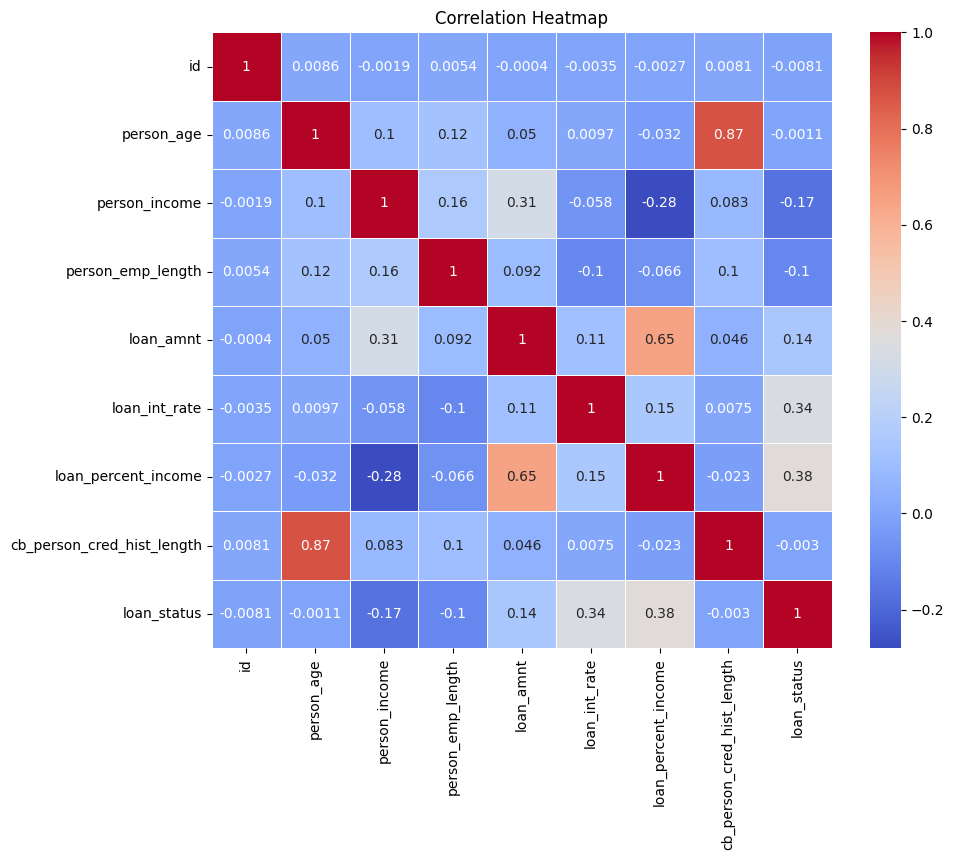

In [52]:
# Select only numeric columns
numeric_data = train_data.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
corr_matrix = numeric_data.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Display the plot
plt.title('Correlation Heatmap')
plt.show()

In [53]:
train_data.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


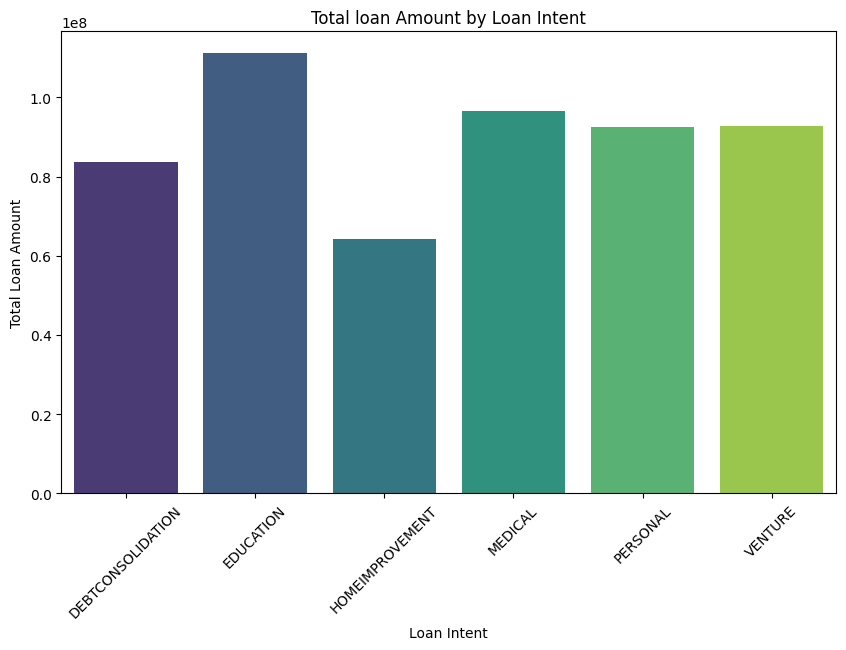

In [54]:
# Aggregate the data: sum loan_Amnt for each loan_amnt
loan_intent_summary = train_data.groupby('loan_intent')['loan_amnt'].sum().reset_index()

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=loan_intent_summary, x='loan_intent', y='loan_amnt', palette='viridis')

# Customise the plot
plt.title('Total loan Amount by Loan Intent')
plt.xlabel('Loan Intent')
plt.ylabel('Total Loan Amount')
plt.xticks(rotation=45) # Rotate x-axis labels for better readability

# Display the plot
plt.show()

From the above bar graph we can see that most of the applicants are applying for education loan followed by medical reasons.

In [55]:
train_data.head()


,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


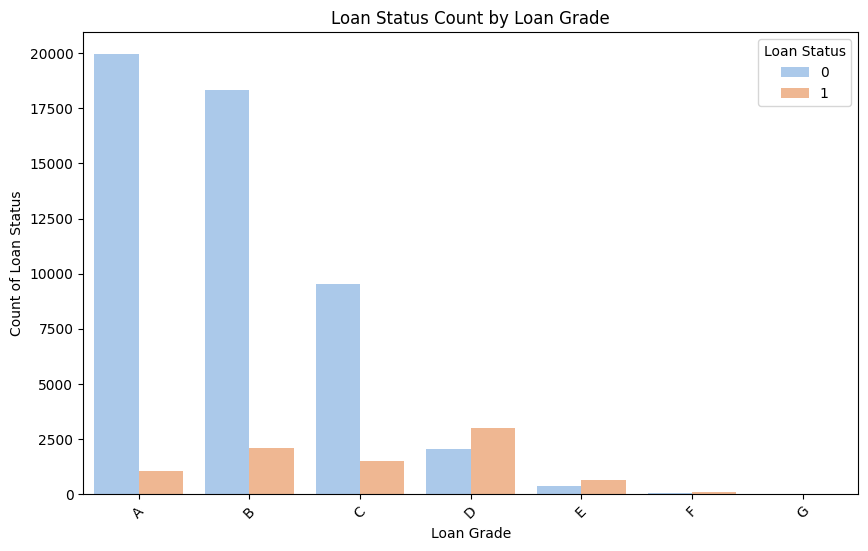

In [56]:
# Aggregate the data: count the number of loans for each loan_grade and loan_status

loan_grade_status_summary = train_data.groupby(['loan_grade', 'loan_status']).size().reset_index(name='count')

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=loan_grade_status_summary, x='loan_grade', y='count', hue='loan_status', palette='pastel')

# Customize the plot
plt.title('Loan Status Count by Loan Grade')
plt.xlabel('Loan Grade')
plt.ylabel('Count of Loan Status')
plt.xticks(rotation=45) # Rotate x-axis labels for better readability
plt.legend(title='Loan Status', loc='upper right')

# Display the plot
plt.show()

Now, we are done with our EDA here. Therefore, moving forward we will start with our modelling proces.

In [57]:
# Split the data into X and y
X = train_data.drop('loan_status', axis=1)
y = train_data['loan_status']

# Split data into train and test sets
np.random.seed(42)

# SPlit into train & test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Now, we've got our data divided into training and test sets, it's time to build a machine learning model.

We'll train the model on the training set and test it on the test set.

We're going to try 3 machine learning models:

1. Logistic Regression
2. K-Nearest Neighbors Classifier
3. Random Forest Classifier

In [60]:
# Put models in dictionary

models = {
    "LogisticRegression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier()
}

# Create a function to find and score models

def fit_and_score(model, X_train, X_test, y_train, y_test):
    """
    Fits and evaluate given machine learning models.
    models: a dict of different Scikit-Learn machine learning models
    X_train: training_data (no labels)
    X_test: testing data (no labels)
    y_train: training labels
    y_test: test labels
    """
    
    # Set random seed
    np.random.seed(42)
    
    # Make aa dictionary to keep model scores
    model_score = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model_score(X_test, y_test)
    return model_scores    

In [61]:
model_scores = fit_and_score(model=models,
                            X_train=X_train,
                            X_test=X_test,
                            y_train=y_train,
                            y_test=y_test)


model_scores

ValueError: could not convert string to float: 'RENT'

In [62]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

In [63]:
# Select categorical columns for OneHotEncoding
categorical_cols = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']

# Initialize OneHotEncode
encoder = OneHotEncoder(sparse=False, drop='first') # Use drop='first' to avoid dummy variable trap

# Fit and transforem the categorical columns
encoded_features = encoder.fit_transform(train_data[categorical_cols])

# Create a dataframe with the encoded features
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_cols))

# Combine the encoded dataframe with the original dataframe (excluding original categorical columns)
df_encoded = pd.concat([train_data.drop(categorical_cols, axis=1).reset_index(drop=True), encoded_df], axis=1)

# Now df_encoded is ready for modeling
# Split your data into features and target variable 
X = df_encoded.drop('loan_status', axis=1) # Features
y = df_encoded['loan_status'] # target variable

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [64]:
model_scores = fit_and_score(model=models,
                            X_train=X_train,
                            X_test=X_test,
                            y_train=y_train,
                            y_test=y_test)


model_scores

ValueError: could not convert string to float: 'RENT'

In [65]:
 # Define models in a dictionary
models = {
    "LogisticRegression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier()
}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models: a dict of different Scikit-Learn machine learning models
    X_train: training_data (no labels)
    X_test: testing data (no labels)
    y_train: training labels
    y_test: test labels
    """
    
    # Set random seed
    np.random.seed(42)
    
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)  # Fixed the typo here
    return model_scores

# Select categorical columns for OneHotEncoding
categorical_cols = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']

# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse=False, drop='first')  # Use drop='first' to avoid dummy variable trap

# Fit and transform the categorical columns
encoded_features = encoder.fit_transform(train_data[categorical_cols])

# Create a DataFrame with the encoded features
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_cols))

# Combine the encoded DataFrame with the original DataFrame (excluding original categorical columns)
df_encoded = pd.concat([train_data.drop(categorical_cols, axis=1).reset_index(drop=True), encoded_df], axis=1)

# Now df_encoded is ready for modeling
# Split your data into features and target variable 
X = df_encoded.drop('loan_status', axis=1)  # Features
y = df_encoded['loan_status']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit and score models
model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)

# Display model scores
print(model_scores)

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


{'LogisticRegression': 0.8818313581720522, 'KNN': 0.8758632449484185, 'Random Forest': 0.9510614715662035}


Here, we can see that RandomForest has the highest score out of the three models we have used. Let's do the model comaprison to understand this more.

<Axes: >

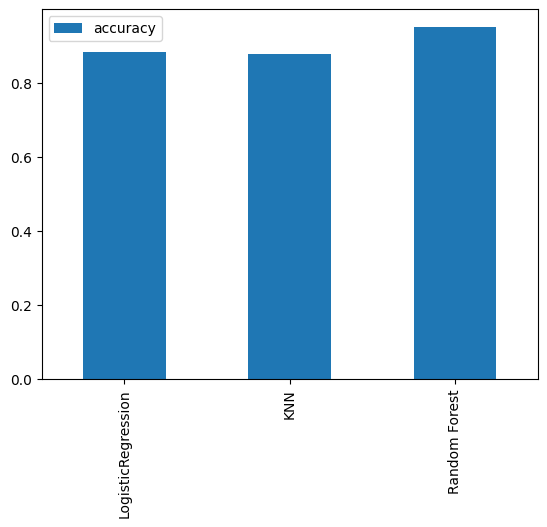

In [66]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar()

### Hyperparameter tuning (by hand)

In [67]:
# Let's tune KNN
train_scores = []
test_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1, 21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    # fit the algorithm
    knn.fit(X_train, y_train)
    # Update the training scores list
    train_scores.append(knn.score(X_train, y_train))
    # Update the test scores list
    test_scores.append(knn.score(X_test, y_test))